# Compute IP/EA with NWChem
Check on how the calculations are doing. What the run times are, what fractions have completed, etc.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from moldesign.simulate.qcfractal import GeometryDataset, SolvationEnergyDataset, HessianDataset, SinglePointDataset, collect_molecular_properties
import pandas as pd
import numpy as np

RDKit WARNING: [14:37:56] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
import os
qca_pwd = 'bTYl1h3cVYY_nQ2tGl3cuEWWnVNmL9WPoH9HF9_3-bQ'
os.environ['QCAUSR'] = qca_pwd

## Get the Geometries
Gather the XTB geometries

In [3]:
dataset = GeometryDataset('Electrolyte Geometry NWChem', 'small_basis')

Print out the general status

In [4]:
dataset.coll.status()

,small_basis
COMPLETE,10497
ERROR,2489


Review the completed geometries

In [5]:
%%time
geoms = dataset.get_energies()
print(f'Completed {sum(map(len, geoms.values()))} geometries of {len(geoms)} molecules')
print(f'All ionic states computed for {len(list(filter(lambda x: len(x) == 3, geoms.values())))} molecules')

Completed 10497 geometries of 4183 molecules
All ionic states computed for 2571 molecules
CPU times: user 5.08 s, sys: 187 ms, total: 5.27 s
Wall time: 11 s


Plot the runtimes

In [6]:
runtimes = dataset.get_complete_records().apply(lambda x: x.provenance.wall_time)

Print statistics in minutes

In [7]:
(runtimes / 60).describe()

count    10497.000000
mean        14.906528
std         20.638045
min          0.553135
25%          4.820838
50%          9.302891
75%         16.677065
max        479.774724
Name: small_basis, dtype: float64

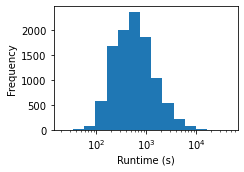

In [8]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

min_ = np.log10(runtimes.min())
max_ = np.log10(runtimes.max())
ax.hist(runtimes, bins=np.logspace(min_ - 0.2, max_ + 0.2, 16))

ax.set_xscale('log')
ax.set_xlabel('Runtime (s)')
ax.set_ylabel('Frequency')

fig.tight_layout()

## Review the ZPE Calculations
We ran Hessian calculations for each geometry

In [9]:
hess = HessianDataset('Electrolyte Hessian', 'nwchem', 'small_basis')

Get the runtimes

In [10]:
%%time
records = hess.get_complete_records()
runtimes = records.apply(lambda x: x.provenance.wall_time)

CPU times: user 8.93 s, sys: 2.95 s, total: 11.9 s
Wall time: 1min 6s


Print statistics in minutes

In [11]:
(runtimes / 60).describe()

count    10399.000000
mean        11.722752
std         21.737953
min          0.226785
25%          3.218389
50%          5.998776
75%         13.381290
max        780.489533
Name: record, dtype: float64

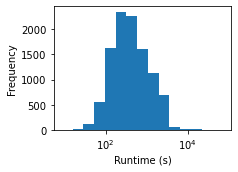

In [12]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

min_ = np.log10(runtimes.min())
max_ = np.log10(runtimes.max())
ax.hist(runtimes, bins=np.logspace(min_ - 0.2, max_ + 0.2, 16))

ax.set_xscale('log')
ax.set_xlabel('Runtime (s)')
ax.set_ylabel('Frequency')

fig.tight_layout()

## Review Vertical Energies
Starting with the XTB geometry

In [13]:
xtb_vert = SinglePointDataset('Electrolyte XTB Neutral Geometry, Small-Basis Energy', 'nwchem', 'small_basis')

Pull down a summary

In [14]:
records = xtb_vert.get_complete_records()
runtimes = records.apply(lambda x: x.provenance.wall_time)
print(f'Completed {len(records)} single point energy computations')

Completed 12065 single point energy computations


In [15]:
(runtimes / 60).describe()

count    12065.000000
mean         0.706182
std          0.903899
min          0.174134
25%          0.338754
50%          0.466157
75%          0.685902
max         20.311530
Name: record, dtype: float64

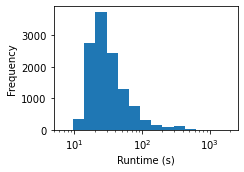

In [16]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

min_ = np.log10(runtimes.min())
max_ = np.log10(runtimes.max())
ax.hist(runtimes, bins=np.logspace(min_ - 0.2, max_ + 0.2, 16))

ax.set_xscale('log')
ax.set_xlabel('Runtime (s)')
ax.set_ylabel('Frequency')

fig.tight_layout()

#### Vertical using the Small Basis Geometry

In [17]:
smb_vert = SinglePointDataset('Electrolyte SMB Neutral Geometry, Small-Basis Energy', 'nwchem', 'small_basis')

Pull down a summary

In [18]:
records = smb_vert.get_complete_records()
runtimes = records.apply(lambda x: x.provenance.wall_time)
print(f'Completed {len(records)} single point energy computations')

Completed 6290 single point energy computations


In [19]:
(runtimes / 60).describe()

count    6290.000000
mean        0.717780
std         0.939200
min         0.162543
25%         0.336626
50%         0.463161
75%         0.688941
max        22.928772
Name: record, dtype: float64

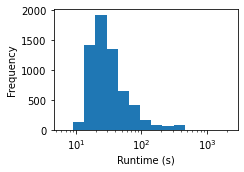

In [20]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

min_ = np.log10(runtimes.min())
max_ = np.log10(runtimes.max())
ax.hist(runtimes, bins=np.logspace(min_ - 0.2, max_ + 0.2, 16))

ax.set_xscale('log')
ax.set_xlabel('Runtime (s)')
ax.set_ylabel('Frequency')

fig.tight_layout()

## Review Solvation Energy Calculations
Compute the solvation energies for all of the molecules

In [21]:
solv_dataset = SolvationEnergyDataset('EDW NWChem Solvation Energy', 'nwchem', 'small_basis')

Pull down a summary

In [22]:
%%time
solv_energies = solv_dataset.get_energies()
solv_df = solv_dataset.coll.get_values()
print(f'Completed {(~solv_df.isnull()).values.sum()} solvation energies '
      f'of {len(solv_energies)} molecules')

Completed 25150 solvation energies of 4179 molecules
CPU times: user 9.94 s, sys: 68.4 ms, total: 10 s
Wall time: 31.7 s


We also do them for the XTB and SMB verticals

In [24]:
xtb_vert_solv = SolvationEnergyDataset('Electrolyte XTB Neutral Geometry, Small-Basis Solvation Energy', 'nwchem', 'small_basis')


## Compute the redox properties
Save them to disk for later user

### Vertical IPs
Fastest approximation, especially when we start with the XTB geometry

In [25]:
redox_data = collect_molecular_properties(xtb_vert, xtb_vert_solv)
print(f'Calculations completed for {len(redox_data)} molecules')

RDKit WARNING: [14:42:14] WARNING:  Problems/mismatches: Mobile-H( Mobile-H groups: Attachment points, Number)
RDKit WARNING: [14:42:22] Cannot assign bond directions!
RDKit WARNING: [14:42:23] Cannot assign bond directions!
RDKit WARNING: [14:42:26] Cannot assign bond directions!


Calculations completed for 4332 molecules


In [26]:
redox_data.to_csv('datasets/small-basis_vertical-xtb_redox.csv', index=False)

Now for the small-basis set geometry

In [28]:
redox_data = collect_molecular_properties(smb_vert)
print(f'Calculations completed for {len(redox_data)} molecules')

RDKit WARNING: [14:48:11] Cannot assign bond directions!


Calculations completed for 2257 molecules


In [29]:
redox_data.to_csv('datasets/small-basis_vertical-smb_redox.csv', index=False)

### Without ZPE Correction
Faster approximation

In [30]:
redox_data = collect_molecular_properties(dataset, solv_dataset)
print(f'Calculations completed for {len(redox_data)} molecules')

RDKit WARNING: [14:49:15] Cannot assign bond directions!


Calculations completed for 4165 molecules


RDKit WARNING: [14:49:23] Cannot assign bond directions!


In [31]:
redox_data.to_csv('datasets/small-basis_no-zpe_redox.csv', index=False)

### With ZPE
Should be closer to agreeing fully

In [32]:
redox_data = collect_molecular_properties(dataset, solv_dataset, hess)
print(f'Calculations completed for {len(redox_data)} molecules')

RDKit WARNING: [14:53:33] Cannot assign bond directions!
RDKit WARNING: [14:53:41] Cannot assign bond directions!


Calculations completed for 4140 molecules


In [33]:
redox_data.to_csv('datasets/small-basis_redox.csv', index=False)